# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

## Import functions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

## Lasso Model (multi linear regression, Cross-Validation)

## Tunage du modèle

In [4]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_LW.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

Computing regularization path using the coordinate descent lasso...


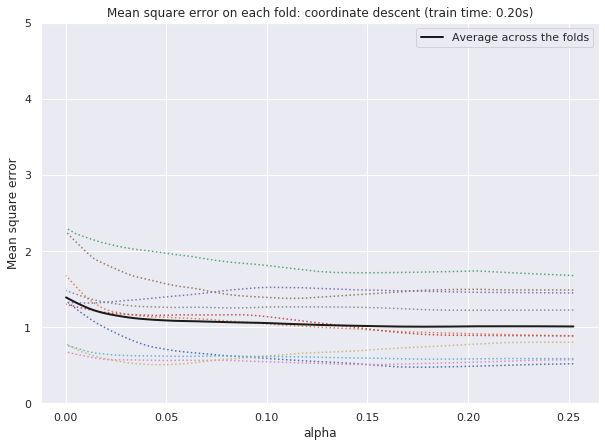

In [5]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Computing regularization path using the coordinate descent lasso...


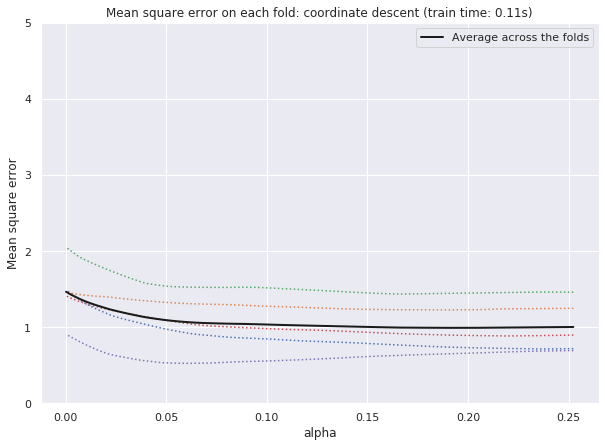

In [6]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV5.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Creation du modèle

In [7]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_LW.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [8]:
alpha = 0.03

In [9]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 2.50178804739729e-09
Coefficients: 
 [-0.12395411  0.05959891 -0.02989028 -0.21681245  0.16641918 -0.02214341
  0.02750936 -0.00692895 -0.         -0.07085935  0.         -0.
  0.          0.          0.09010119  0.05136506  0.13638558 -0.03685236
 -0.09112927  0.00239948  0.06298999  0.          0.         -0.02433637
 -0.10354703 -0.14287315  0.07166396 -0.          0.03512122 -0.        ]
Score: 
 0.28863127892865725


In [10]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
#Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

In [11]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [12]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

y_true = y

DFYeq_lasso = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq_lasso['members'] = nb_p_list
DFYeq_lasso['members_0'] = range(0,102,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq_lasso

,y_true,y_eq,members,members_0
0,0.189843,0.355664,p311,0
1,1.085749,0.837191,p312,1
2,0.275485,-0.354658,p314,2
3,1.743799,0.303122,p316,3
4,-0.155003,-0.066784,p317,4
...,...,...,...,...
97,1.068395,-0.420075,p465,97
98,-0.791668,-0.682201,p467,98
99,-0.362399,-0.642565,p469,99
100,0.079295,0.232082,p470,100


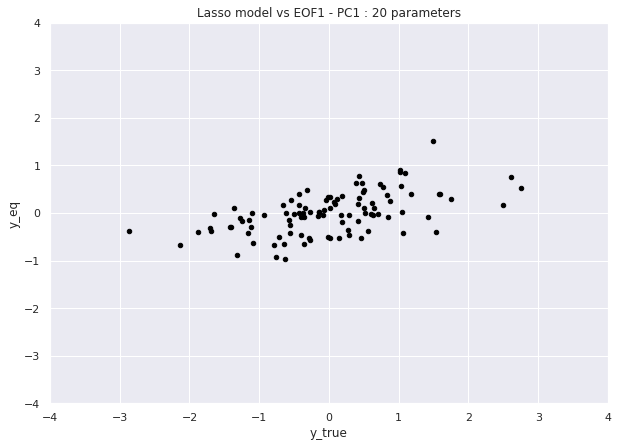

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#print('Coefficient of determination: %.2f'
#      % r2_score(X_test, y_pred))

ax = plt.gca()
title = 'Lasso model vs EOF1 - PC1 : 20 parameters'
DFYeq_lasso.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred_lasso, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE2_Lasso_12.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.18782201]
Coefficient of determination: 0.34


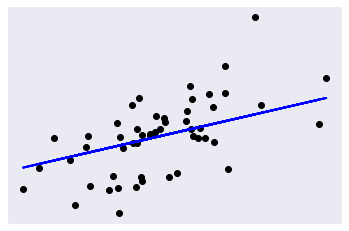

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

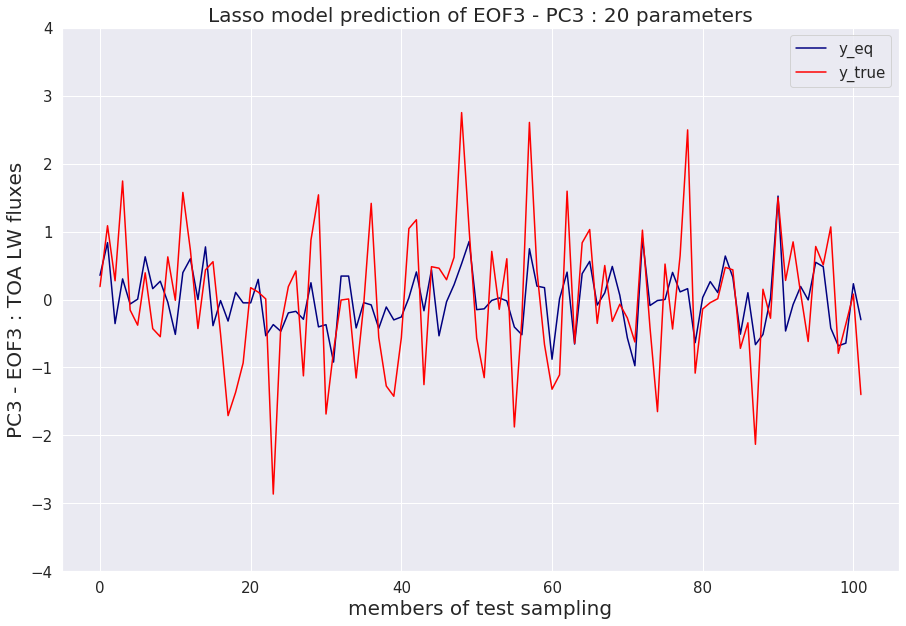

In [15]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq_lasso, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq_lasso, color='red',ax=ax)
plt.title('Lasso model prediction of EOF3 - PC3 : 20 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('PC3 - EOF3 : TOA LW fluxes',fontsize=20)
plt.ylim(-4, 4)
ax.tick_params(axis='both', labelsize=15)

## LASSO model : prediction

In [16]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [17]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 2.50178804739729e-09
Coefficients: 
 [-0.12395411  0.05959891 -0.02989028 -0.21681245  0.16641918 -0.02214341
  0.02750936 -0.00692895 -0.         -0.07085935  0.         -0.
  0.          0.          0.09010119  0.05136506  0.13638558 -0.03685236
 -0.09112927  0.00239948  0.06298999  0.          0.         -0.02433637
 -0.10354703 -0.14287315  0.07166396 -0.          0.03512122 -0.        ]
Score: 
 0.28863127892865725


In [18]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

AKN           -0.123954
ALPHAT         0.059599
ALD           -0.029890
ALMAVE        -0.216812
AGREF          0.166419
AGRE1         -0.022143
AGRE2          0.027509
RAUTEFR       -0.006929
RQLCR         -0.000000
RAUTEFS       -0.070859
RQICRMIN       0.000000
RQICRMAX      -0.000000
TFVL           0.000000
TFVI           0.000000
TFVR           0.090101
TFVS           0.051365
RKDN           0.136386
RKDX          -0.036852
TENTR         -0.091129
TENTRX         0.002399
VVN            0.062990
VVX            0.000000
ALFX           0.000000
FNEBC         -0.024336
GCTURB        -0.103547
RLWINHF_ICE   -0.142873
RLWINHF_LIQ    0.071664
RSWINHF_ICE   -0.000000
RSWINHF_LIQ    0.035121
REFLCAPE      -0.000000
Name: 0, dtype: float64

In [19]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[0.37981232621887867,
 0.2873687407222915,
 -0.44135805628184555,
 0.32626303750971875,
 0.04158762416216898,
 0.5426113322651599,
 -0.6351180294356296,
 -0.5310009494139386,
 -0.679045778252407,
 -0.8794657956153126,
 0.4360894548244855,
 -0.5035556881663205,
 -0.4835229847860628,
 0.07546883057136416,
 0.36869763022826374,
 0.09772751295449901,
 0.1754549969585767,
 -0.051058019061456,
 -0.33659966429718835,
 0.3337878483489636,
 -0.39843777550058634,
 -0.0011314158845058023,
 0.2845328860298385,
 -0.14046676611329537,
 0.22392507777728723,
 -0.6916097999833262,
 0.09654996007318321,
 -0.2731278638029729,
 -0.13307664097102395,
 0.1042297946776491,
 0.044912368243370596,
 0.23268896259198754,
 -0.43870503617273343,
 -0.04541596973912503,
 -1.128618484137815,
 -0.4380440242833978,
 0.21001685252835822,
 -0.3536796196585277,
 0.5736772965790339,
 0.7626535548541808,
 0.10690456106326678,
 0.5268440905971132,
 -0.30608617569229035,
 0.3628458253398533,
 0.12977460581111713,
 0.123285125

In [20]:
members = arange(102,1102,1)
DFYpred_lasso = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_lasso

,y_pred,members
0,0.379812,102.0
1,0.287369,103.0
2,-0.441358,104.0
3,0.326263,105.0
4,0.041588,106.0
...,...,...
995,1.067003,1097.0
996,-0.100144,1098.0
997,0.040621,1099.0
998,-0.477829,1100.0


## Multi Linear Regression model PC3 - EOF3

In [3]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_LW.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [4]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 0.012517415954932274
Coefficients: 
 [-0.12993043  0.09491616 -0.08740207 -0.23277326  0.20742776 -0.06327189
  0.06667751 -0.03875245 -0.04824212 -0.11599554  0.03050335 -0.01917097
 -0.027092   -0.00921561  0.12372277  0.09094375  0.14520429 -0.07137589
 -0.09353951  0.00996062  0.04028489  0.02809552 -0.02244771 -0.05375552
 -0.1331722  -0.18621595  0.09767303 -0.02107685  0.06504112 -0.0526205 ]
Score: 
 0.2993515774130854


In [5]:
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

In [24]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [25]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
DFYeq['members_0'] = range(0,102,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members,members_0
0,0.189843,0.502914,p311,0
1,1.085749,1.014468,p312,1
2,0.275485,-0.336147,p314,2
3,1.743799,0.338165,p316,3
4,-0.155003,-0.093139,p317,4
...,...,...,...,...
97,1.068395,-0.390199,p465,97
98,-0.791668,-0.888862,p467,98
99,-0.362399,-0.791742,p469,99
100,0.079295,0.035085,p470,100


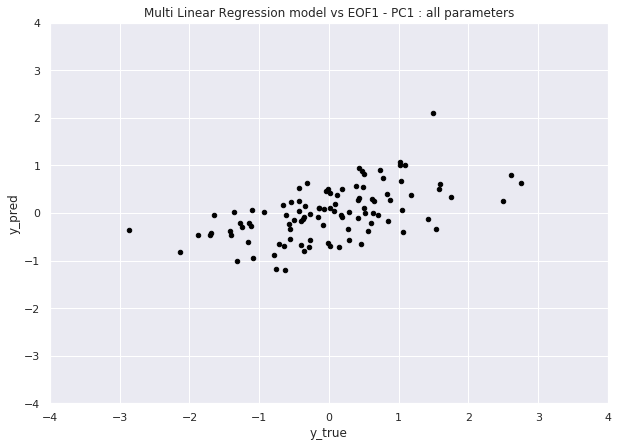

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Multi Linear Regression model vs EOF1 - PC1 : all parameters'
DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title(title)
plt.xlim(-4,4)
plt.ylim(-4,4)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.24184981]
Coefficient of determination: 0.31


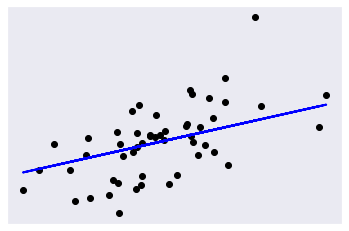

In [27]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

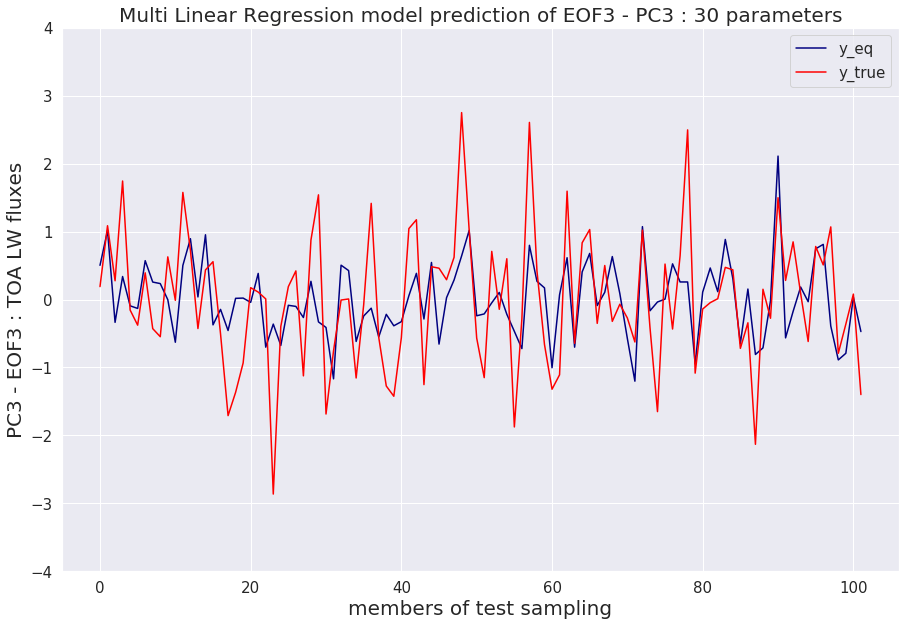

In [28]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq, color='red',ax=ax)
plt.title('Multi Linear Regression model prediction of EOF3 - PC3 : 30 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('PC3 - EOF3 : TOA LW fluxes',fontsize=20)
plt.ylim(-4, 4)
ax.tick_params(axis='both', labelsize=15)

## Multi Linear Regression model : prediction

In [29]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [30]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[0.593946390014003,
 0.467363082746142,
 -0.5490528280771825,
 0.2627478987173881,
 0.13946583828686784,
 0.7347300637052874,
 -0.7489125172826303,
 -0.7243030995139357,
 -1.076646498762629,
 -1.2062027348245719,
 0.4840398902741035,
 -0.7070828925736656,
 -0.7239909199726839,
 0.057094211816523466,
 0.35930531550446965,
 0.054572188342399255,
 0.21603602010210185,
 -0.15903111864461636,
 -0.3826521521794093,
 0.6516465794793467,
 -0.3534052492236651,
 -0.14458213144606555,
 0.3389692753664617,
 -0.23133954479599897,
 0.35940577358064457,
 -0.9628943560392486,
 0.11181683325605656,
 -0.3999648298461791,
 0.022752875004141058,
 0.07922733195660125,
 0.08257713330807123,
 0.23502975761005726,
 -0.4796096449018377,
 -0.15607052028041504,
 -1.448848703700189,
 -0.529446501279775,
 0.24338733188204303,
 -0.5581577644142386,
 0.8421587738647847,
 1.1571556835118835,
 0.016696154706717425,
 0.8694742321018342,
 -0.16670741064537387,
 0.5968408701939809,
 0.22003728749973045,
 0.25165169669554

In [31]:
members = arange(102,1102,1)
DFYpred = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred

,y_pred,members
0,0.593946,102.0
1,0.467363,103.0
2,-0.549053,104.0
3,0.262748,105.0
4,0.139466,106.0
...,...,...
995,1.405114,1097.0
996,-0.169801,1098.0
997,0.048946,1099.0
998,-0.540302,1100.0


## Neural Network PC3 - EOF3

In [32]:
# Set the X and Y : Y = f(X)
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_LW.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [33]:
# split the dataset
X_train = X[0:80,:]
X_test = X[80:,:]
#X_val = X[40:,:]

y_train = y[0:80]
y_test = y[80:]
#y_val = y[40:]

In [34]:
skill_score=[]

i=1
N=100
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(i, 2))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [35]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['hidden_layer_sizes']=np.arange(1,100,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,hidden_layer_sizes,RMSE
0,1,1.104254
1,2,0.998287
2,3,1.067287
3,4,1.232062
4,5,0.779344
...,...,...
94,95,0.886370
95,96,0.832140
96,97,1.022603
97,98,0.958453


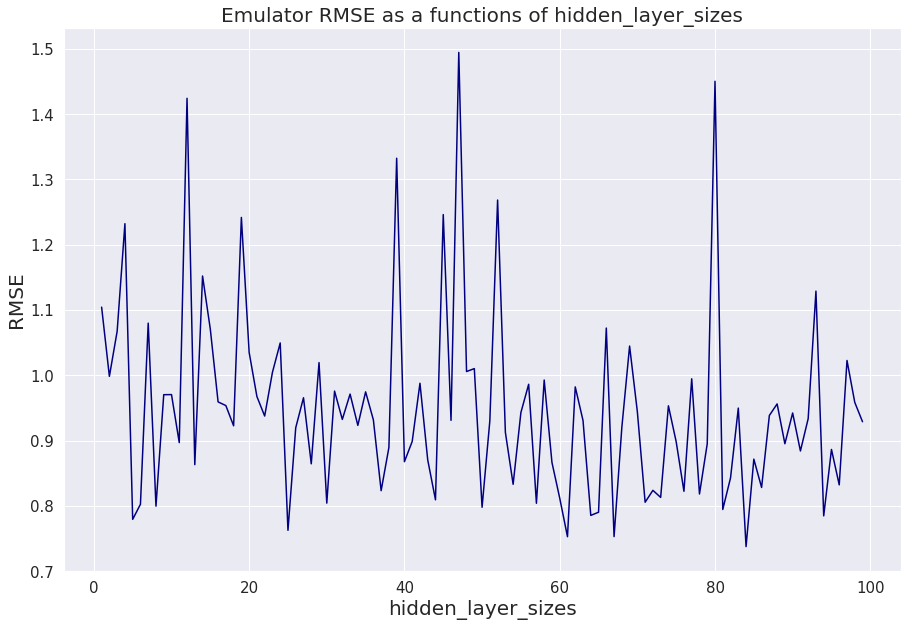

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="hidden_layer_sizes", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('hidden_layer_sizes',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

In [37]:
skill_score=[]

i=1
N=10
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(5, i))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [38]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['n_layer']=np.arange(1,10,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,n_layer,RMSE
0,1,0.931571
1,2,0.767492
2,3,1.235566
3,4,0.889040
4,5,0.901483
5,6,1.024377
6,7,0.794660
7,8,0.872859
8,9,0.858251


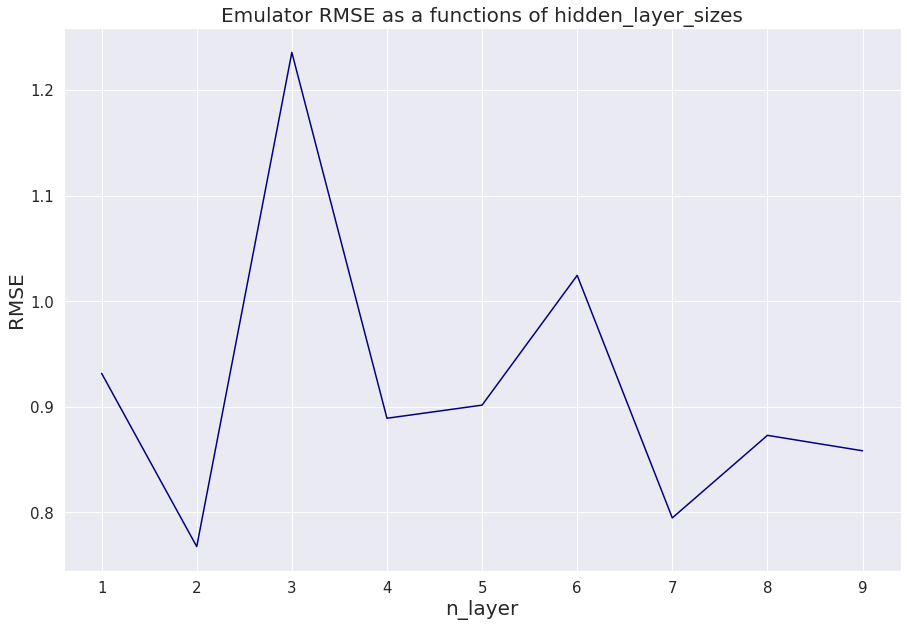

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="n_layer", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('n_layer',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

## Création du modèle

In [100]:
NN = MLPRegressor(hidden_layer_sizes=(10,3))
NN = NN.fit(X_train,y_train)

y_val = NN.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

Mean Absolute Error: 0.5947626013328449
Mean Squared Error: 0.5725696983078236
Root Mean Squared Error: 0.7566833540575765


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [101]:
DFYeq_NN  = pd.DataFrame()
DFYeq_NN['y_eq'] = y_val
DFYeq_NN['y_true'] = y_test
DFYeq_NN['members'] = range(0,22,1)
DFYeq_NN

,y_eq,y_true,members
0,0.027493,-0.139756,0
1,0.191625,-0.046534,1
2,-0.107369,0.011845,2
3,0.715737,0.472912,3
4,0.326128,0.436597,4
5,-0.439092,-0.719237,5
6,-0.212522,-0.342682,6
7,-0.245452,-2.131183,7
8,-0.571613,0.150914,8
9,0.063702,-0.275979,9


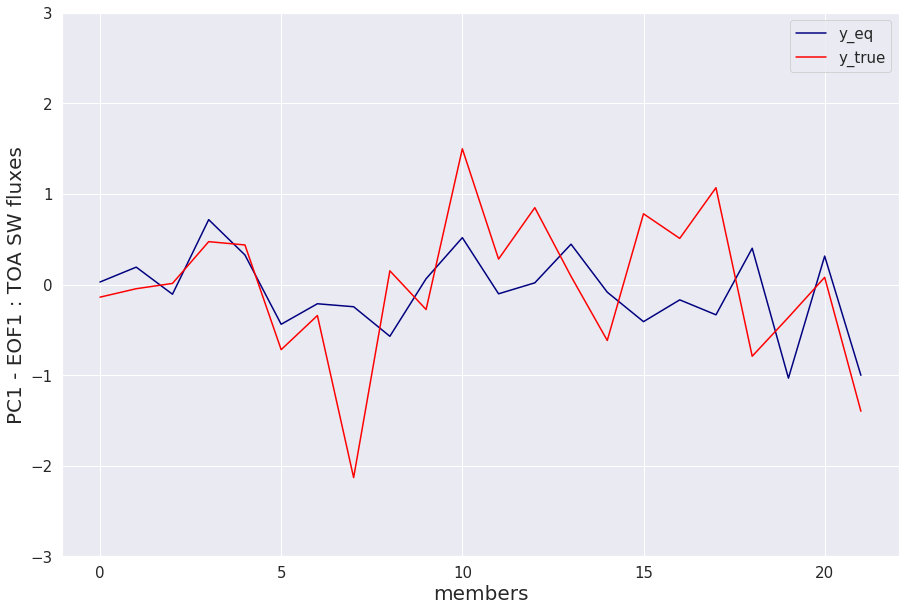

In [102]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members", y="y_eq", data=DFYeq_NN,color='navy',ax=ax)
ax = sns.lineplot(x="members", y="y_true", data=DFYeq_NN,color='red',ax=ax)
#plt.title('Emulator RMSE as a functions of max_iter', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members',fontsize=20)
plt.ylabel('PC1 - EOF1 : TOA SW fluxes',fontsize=20)
plt.ylim(-3, 3)
ax.tick_params(axis='both', labelsize=15)

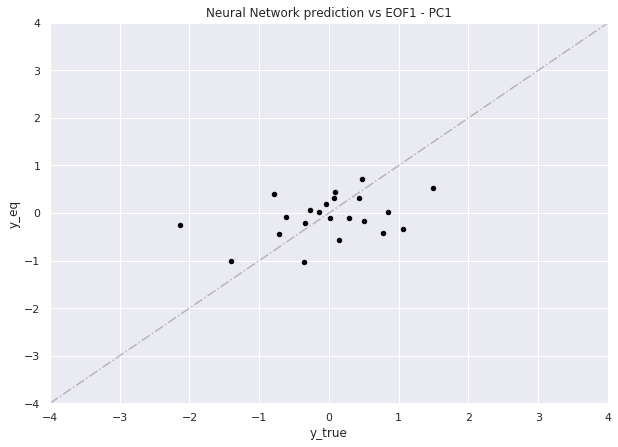

In [103]:
#import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
#import matplotlib.pyplot as plt

ax1 = plt.gca()
title = 'Neural Network prediction vs EOF1 - PC1'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax1)


DFYeq_NN.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax1)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)


plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-4,4)
plt.ylim(-4,4)


# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Neural Network : prediction

In [104]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [105]:
y_pred = NN.predict(LHS_df)

In [106]:
members = arange(102,1102,1)
DFYpred_NN = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_NN

,y_pred,members
0,-1.168220,102.0
1,0.134477,103.0
2,-0.809552,104.0
3,0.161477,105.0
4,-0.201064,106.0
...,...,...
995,1.405182,1097.0
996,0.093903,1098.0
997,-0.294951,1099.0
998,-1.026530,1100.0


# Plotting Part

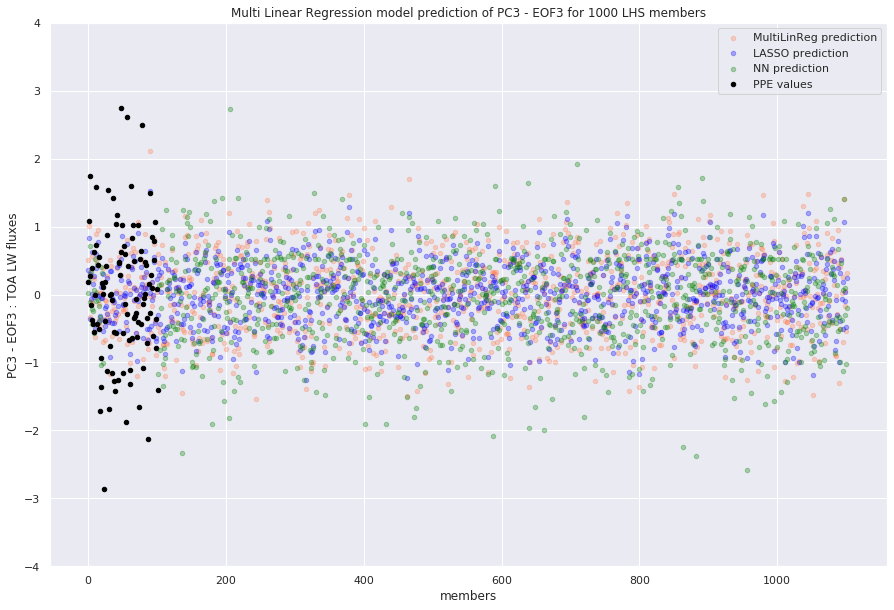

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
title = 'Multi Linear Regression model prediction of PC3 - EOF3 for 1000 LHS members'

# y_true validation
DFYeq.plot(kind='scatter', x='members_0', y='y_eq', color='coral', alpha = 0.3,
                     style='.', legend=False, ax = ax)
DFYeq_lasso.plot(kind='scatter', x='members_0',legend=False, y='y_eq', color='blue', alpha = 0.3,
                     style='.', ax = ax)
DFYeq_NN.plot(kind='scatter', x='members',legend=False, y='y_eq', color='green', alpha = 0.3,
                     style='.', ax = ax)

# (y_true) : PC1 - EOF1 dans l'ensemble
DFYeq.plot(kind='scatter', x='members_0', y='y_true', color='black', 
                     style='.', ax = ax)

# LHS Prediction
DFYpred.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='coral', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_lasso.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='blue', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_NN.plot(kind='scatter', x='members',legend=False, y='y_pred', color='green', alpha = 0.3,
                     style='.', ax = ax)


plt.xlabel('members')
plt.ylabel('PC3 - EOF3 : TOA LW fluxes')
plt.legend(['MultiLinReg prediction', 'LASSO prediction', 'NN prediction', 'PPE values'])
plt.title(title)
#plt.xlim(-4,200)
plt.ylim(-4,4)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [108]:
MultiLinReg_validation = DFYeq['y_eq'].values
MultiLinReg_prediction = DFYpred['y_pred'].values

LASSO_validation = DFYeq_lasso['y_eq'].values
LASSO_prediction = DFYpred_lasso['y_pred'].values

NN_validation = DFYeq_NN['y_eq'].values
NN_prediction = DFYpred_NN['y_pred'].values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_validation_eof3_LW.npy', 
        MultiLinReg_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof3_LW.npy', 
        MultiLinReg_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_validation_eof3_LW.npy', 
        LASSO_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof3_LW.npy', 
        LASSO_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/NN_validation_eof3_LW.npy', 
        NN_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/NN_prediction_eof3_LW.npy', 
        NN_prediction)

# Choix des paramètres réduits 

In [6]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
TFVI,0.009216,0
TENTRX,0.009961,1
RQICRMAX,0.019171,2
RSWINHF_ICE,0.021077,3
ALFX,0.022448,4
TFVL,0.027092,5
VVX,0.028096,6
RQICRMIN,0.030503,7
RAUTEFR,0.038752,8
VVN,0.040285,9


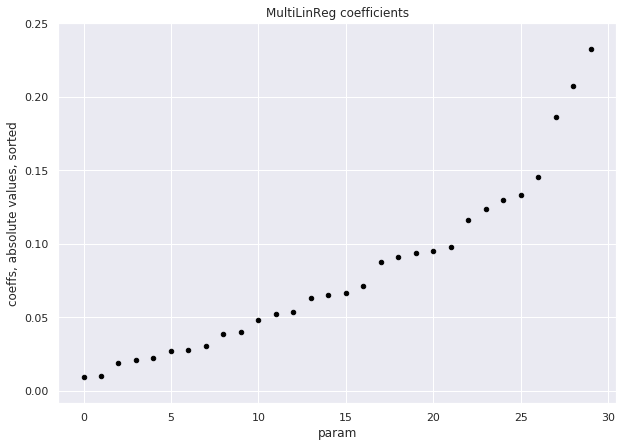

In [7]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Sobol analysis

In [8]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_LW.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [9]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd


# Set the boundaries of the parameter values
bounds=[]
for i in range(0,len(param_names),1):
    bounds_tmp=[X[:,i].min(), X[:,i].max()]
    bounds.append(bounds_tmp)
                                                      
# Define the problem
problem = {
    'num_vars': len(param_names),
    'names': [param_names],
    'bounds' : bounds
}


# Make the Satelli sampling
param_values = saltelli.sample(problem, 1000)


In [10]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 0.012517415954932274
Coefficients: 
 [-0.12993043  0.09491616 -0.08740207 -0.23277326  0.20742776 -0.06327189
  0.06667751 -0.03875245 -0.04824212 -0.11599554  0.03050335 -0.01917097
 -0.027092   -0.00921561  0.12372277  0.09094375  0.14520429 -0.07137589
 -0.09353951  0.00996062  0.04028489  0.02809552 -0.02244771 -0.05375552
 -0.1331722  -0.18621595  0.09767303 -0.02107685  0.06504112 -0.0526205 ]
Score: 
 0.2993515774130854


In [11]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN           -0.129930
ALPHAT         0.094916
ALD           -0.087402
ALMAVE        -0.232773
AGREF          0.207428
AGRE1         -0.063272
AGRE2          0.066678
RAUTEFR       -0.038752
RQLCR         -0.048242
RAUTEFS       -0.115996
RQICRMIN       0.030503
RQICRMAX      -0.019171
TFVL          -0.027092
TFVI          -0.009216
TFVR           0.123723
TFVS           0.090944
RKDN           0.145204
RKDX          -0.071376
TENTR         -0.093540
TENTRX         0.009961
VVN            0.040285
VVX            0.028096
ALFX          -0.022448
FNEBC         -0.053756
GCTURB        -0.133172
RLWINHF_ICE   -0.186216
RLWINHF_LIQ    0.097673
RSWINHF_ICE   -0.021077
RSWINHF_LIQ    0.065041
REFLCAPE      -0.052621
Name: 0, dtype: float64

In [12]:

# Run the emulator for all of the cases

R = regr.intercept_

N=len(param_values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*param_values[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
    
# Perform analysis
y_pred=np.array(y_pred)
Si = sobol.analyze(problem, y_pred)
print(Si['S1'])

[ 5.85634827e-02  2.91921566e-02  2.62780174e-02  1.86008042e-01
  1.46367420e-01  1.09306686e-02  1.86241868e-02  5.10874050e-03
  1.06464018e-02  4.63937743e-02  5.05906827e-03  1.09654992e-03
  2.41383713e-03  2.51621369e-04  5.38716523e-02  2.55578701e-02
  7.35920660e-02  1.80074988e-02  2.80355392e-02 -3.08903583e-06
  6.68891675e-03  2.56439477e-03  1.02446172e-03  1.17217964e-02
  6.60660099e-02  1.01826847e-01  3.19041842e-02  2.12856609e-03
  1.20265547e-02  1.11310742e-02]


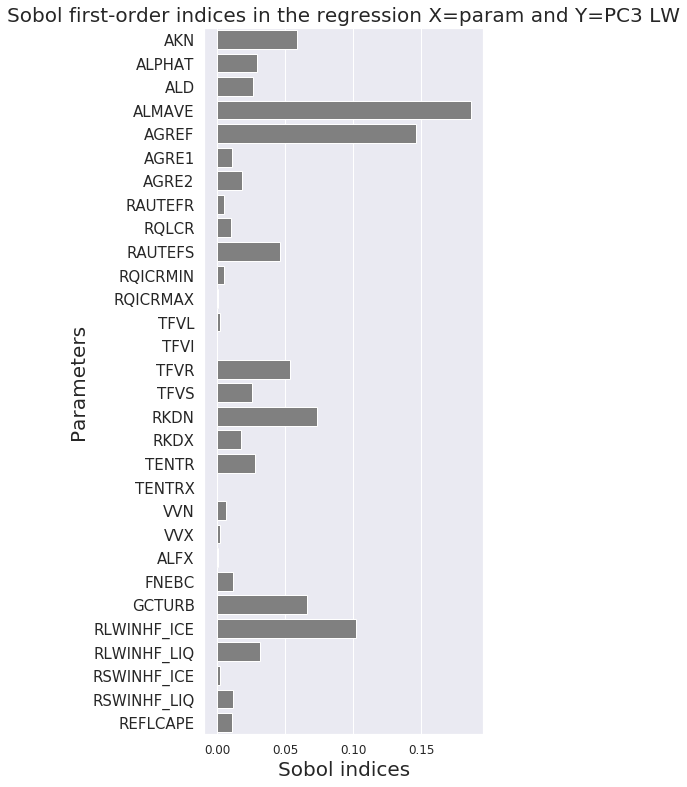

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.DataFrame()
data['Parameters']=param_names
data['Sobol1']=Si['S1']

# Plot the Sobol index to identify the most important parameters 
fig, ax = plt.subplots(figsize=(5,13))
ax = sns.barplot(x='Sobol1',y='Parameters',data=data, color='grey', orient='h', ax=ax)

plt.title('Sobol first-order indices in the regression X=param and Y=PC3 LW', fontsize=20)
plt.xlabel('Sobol indices', fontsize=20)
plt.ylabel('Parameters', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
    
#plt.show()

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Sobol_indices.png", dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches='tight', pad_inches=0.1,
#        frameon=None, metadata=None)